In [559]:
from definitions import ROOT_DIR
%cd $ROOT_DIR
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from copy import copy

print("Dopasowujemy model surogatowy nauczony dla pacjenta EP1 (patient202205141015) do danych dla pacjenta EP3 (patient202205170854)")
USE_REAL_TIME = True

/home/x/doc/dev/master/CancerTherapyPrediction
Dopasowujemy model surogatowy nauczony dla pacjenta EP1 (patient202205141015) do danych dla pacjenta EP3 (patient202205170854)


In [560]:
def show_param_change(params1, model,parameterName, range):
    for i in range:
        params1[parameterName] = i
        lineLabel = None
        if i == range[0] or i==range[-1]:
            lineLabel = i
        plot_parameters(model,params1,steps_forward,steps_backward,threatment_start,None,USE_REAL_TIME,t_real,lineLabel=lineLabel)

    plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

    plt.title(f"Zmieniamy zmienną {parameterName}")
    # plt.legend()
    plt.show()

mln=1000000


In [561]:



from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_parameters, plot_truth
from data.klusek.EP3.config import threatment_start, threatment_end,threatment2_start
from asymilacja.model.utils_linsp import GS5, GS1, GS3, GS4

threatment_time = threatment_end - threatment_start
steps_backward = threatment_start
steps_forward = threatment2_start - threatment_start

df = pd.read_csv("data/klusek/EP3/stats0.csv")
df_true = df[(df['iteration'] >= 0) & (df['iteration']<=threatment2_start)]
P_true = list(df_true.prolif_cells)
t_true = list(df_true.iteration)
t_real = list(df_true.t)
maxi = np.max(df.prolif_cells)*1.5
print(f'maxi K {maxi}')

maxi K 2846866.5


  # Training12_GS3.py

In [562]:
#EP1/Training12_GS3.py
maximal = {'P0': 142730, 'C0': 0.10633334813778368, 'gamma_p': 0.013758201527286379, 'K': 350041.56768561504, 'T_death': 350322.5631338349, 'eta': 0.09982153123469456, 'KDE': 0.0009514332680014279, 'lambda_p': 8.918966902084491e-05}
params = maximal
params['P0'] = df_true.loc[threatment_start,"prolif_cells"]
params['K'] = maxi

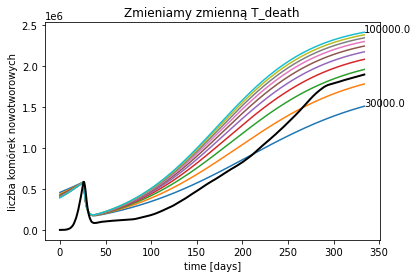

In [563]:
params1 = copy(params)
range = np.linspace(30000,100000,10)
show_param_change(params1, GS3,'T_death', range)


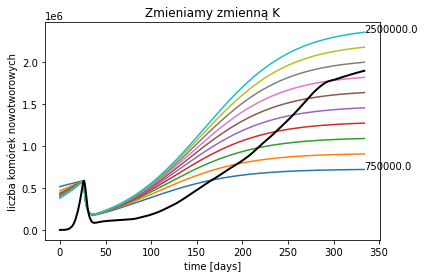

In [564]:
params1 = copy(params)
range = np.linspace(750000,2500000,10)
show_param_change(params1, GS3,'K', range)

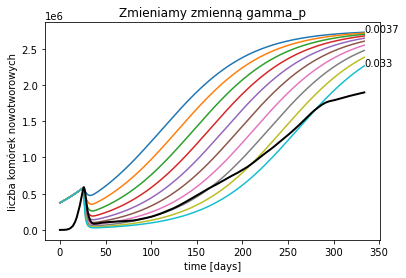

In [565]:
params1 = copy(params)
range = np.linspace(0.0037,0.033,10)
show_param_change(params1, GS3,'gamma_p', range)

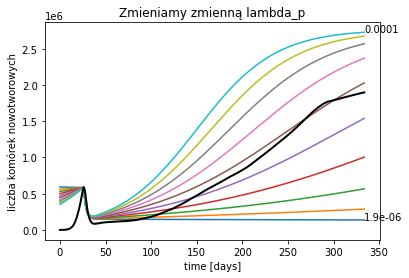

In [566]:
params1 = copy(params)
range = np.linspace(1.9e-06,1e-04,10)
show_param_change(params1, GS3,'lambda_p', range)

# Training13_GS5.py

In [567]:
#EP1/Training13_GS5
maximal ={'P0': 142730, 'C0': 3.1350094623894074, 'gamma_p': 0.0002899885604836935, 'KDE': 0.0004971029545181719, 'K': 424354.54431511427, 'eta': 0.2999968345615772, 'alpha': 5.000000000208709e-06, 'alpha_diff': 15.000000002287718, 'lambda_p': 7.500000001456923e-05}
params = maximal
params['P0'] = df_true.loc[threatment_start,"prolif_cells"]
params['K'] = maxi


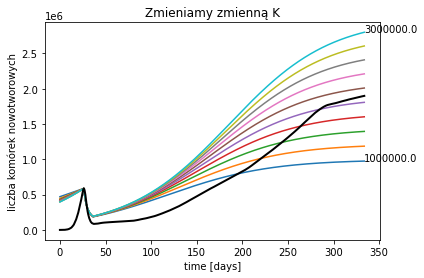

In [568]:

params1 = copy(params)


range =np.linspace(1.0*mln,3*mln,10)
show_param_change(params1, GS5,'K', range)

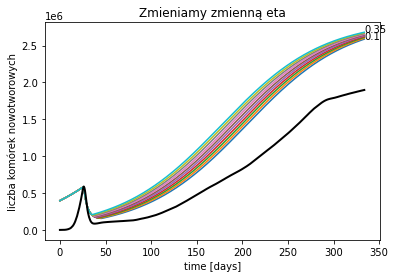

In [569]:
params1 = copy(params)

range = np.linspace(0.1,0.35,10)
show_param_change(params1, GS5,'eta', range)


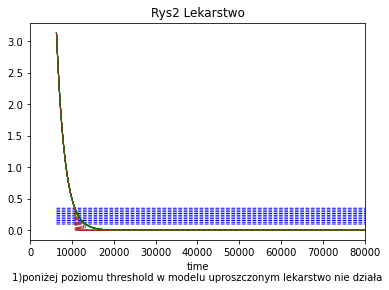

In [570]:
params1 = copy(params)
from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_curement
steps_forward=threatment2_start-threatment_start

range =np.linspace(0.1,0.35,10)
for i in range:
    params1['eta'] = i
    lineLabel = None
    if i == range[0] or i==range[-1]:
        lineLabel = i
    plot_curement(GS5,params1,steps_forward,threatment_start,params_eta=None)

plt.show()

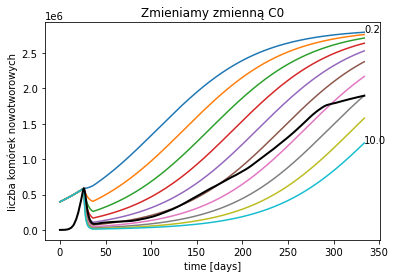

In [571]:

params1 = copy(params)
# params1['KDE'] = 100
# params1['eta'] = 0.2
# params1['eta'] =0.299999
# params1['KDE'] = -np.log(params1['eta']/(threatment_time+200))
# print(params1['KDE'] )
# print(params1['KDE'] )
# params1['KDE'] = 0.0005

range = np.linspace(0.2,10,10)
show_param_change(params1, GS5,'C0', range)



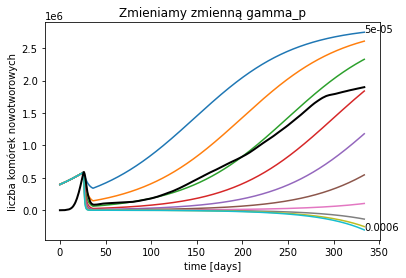

In [572]:


# params1['KDE'] = np.log(params1['eta']/threatment_time+200)
range =np.linspace(0.00005,0.0006,10)
show_param_change(params1, GS5,'gamma_p', range)



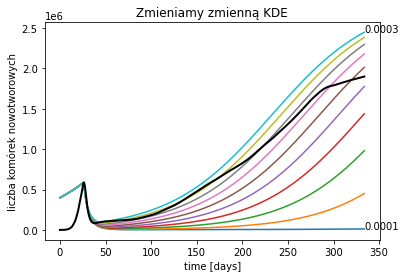

In [573]:
params1 = copy(params)


mln=1000000
range = np.linspace(0.0001,0.0003,10)
show_param_change(params1, GS5,'KDE', range)


# Training15_GS1
dPdt = lambda_p * P*(1-P/K) - gamma_p * unit_step_fun(C,eta)  * P

In [574]:
#EP1/Training15_GS1.py
maximal = {'P0': 142730, 'C0': 5.380861282944324, 'gamma_p': 0.00019718594472837436, 'K': 295647.30000000016, 'eta': 0.2999999999661837, 'KDE': 0.0004970985980341276, 'lambda_p': 0.00010000000001493816}

params = maximal
params['P0'] = df_true.loc[threatment_start,"prolif_cells"]
params['K'] = maxi


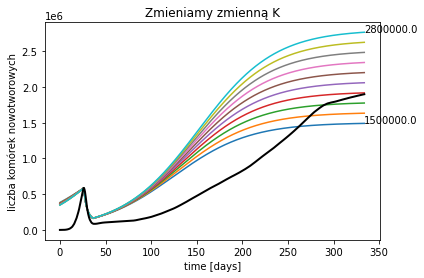

In [575]:
params1 = copy(params)
range = np.linspace(1500000,2800000,10)
show_param_change(params1, GS1,'K', range)


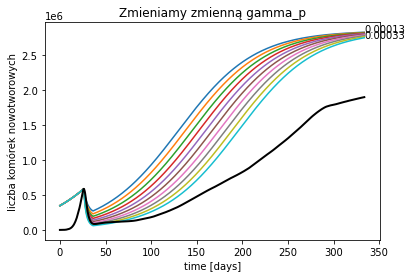

In [576]:
params1 = copy(params)
range = np.linspace(0.00013,0.00033,10)
show_param_change(params1, GS1,'gamma_p', range)

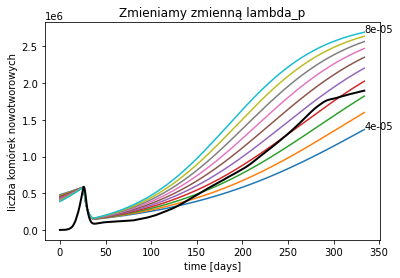

In [577]:
params1 = copy(params)
range =np.linspace(0.00004,0.00008,10)
show_param_change(params1, GS1,'lambda_p', range)


# Training16_GS4.py

In [578]:
maximal = {'P0': 202559, 'C0': 9.999999999185693, 'K': 1369413.4097078599, 'eta': 0.1000000000364073, 'gamma_p': 0.009999999999920812, 'KDE': 1.0000000041032971e-06, 'KDE2': 0.00010000000880939492, 'lambda_p': 5.186654993899278e-05}
params = maximal
params['P0'] = df_true.loc[threatment_start,"prolif_cells"]
params['K'] = maxi



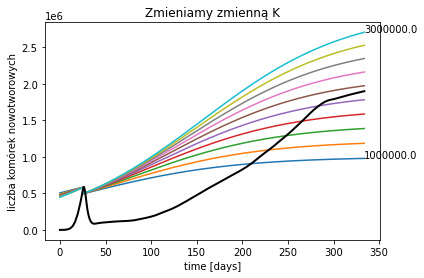

In [579]:
params1 = copy(params)
range =np.linspace(1000000,3000000,10)
show_param_change(params1, GS4,'K', range)

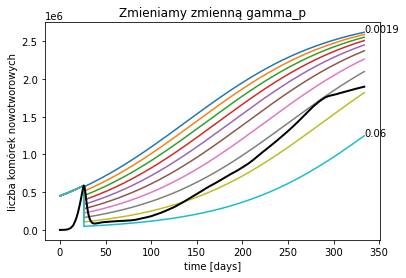

In [580]:
params1 = copy(params)
range =np.linspace(0.0019,0.06,10)
show_param_change(params1, GS4,'gamma_p', range)

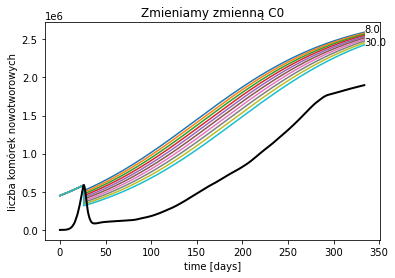

In [581]:
params1 = copy(params)
range =np.linspace(8,30,10)
show_param_change(params1, GS4,'C0', range)